In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [14]:
data = pd.read_csv('advertising.csv')

In [15]:
print(data.head())

   Unnamed: 0     TV  Radio  Newspaper  Sales
0           1  230.1   37.8       69.2   22.1
1           2   44.5   39.3       45.1   10.4
2           3   17.2   45.9       69.3    9.3
3           4  151.5   41.3       58.5   18.5
4           5  180.8   10.8       58.4   12.9


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [21]:
data.drop(columns=['Unnamed: 0'], inplace=True)


In [23]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [27]:
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

<Figure size 800x600 with 0 Axes>

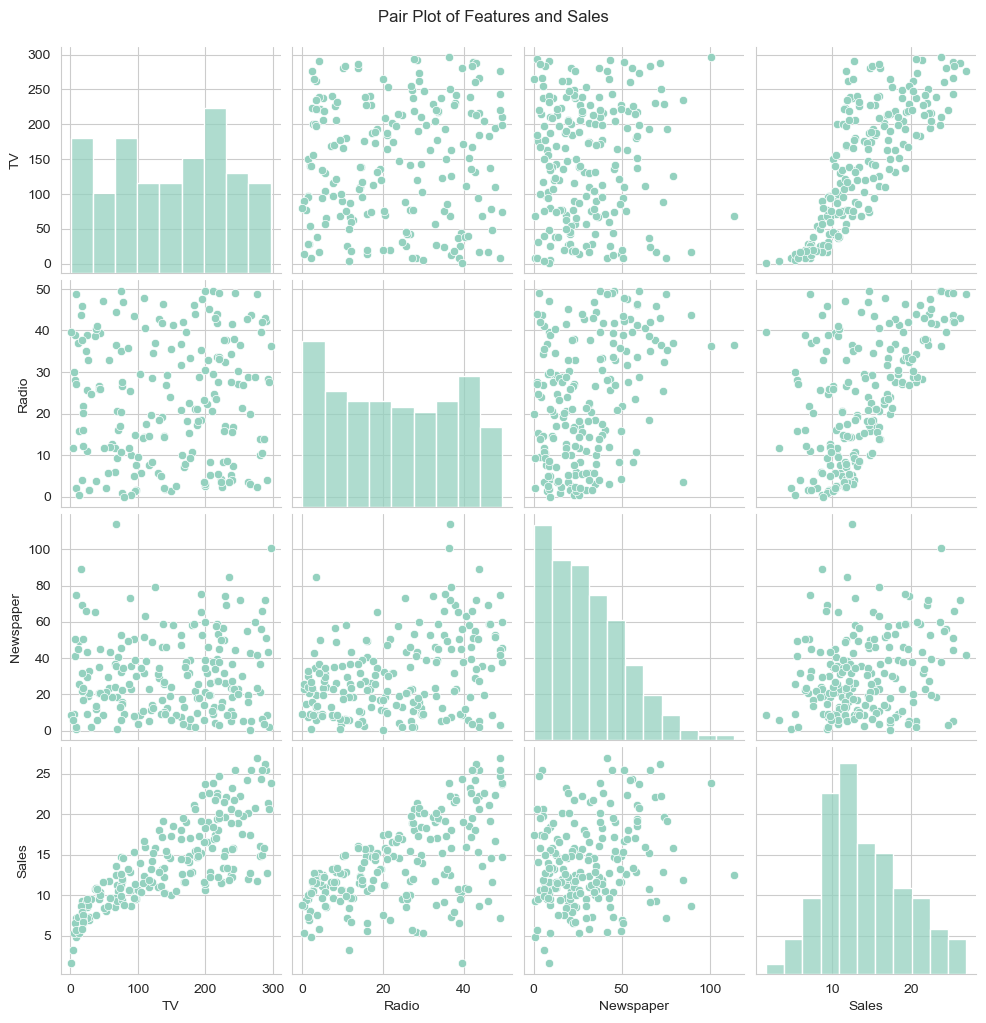

In [31]:
plt.figure(figsize=(8, 6))
sns.pairplot(data, height=2.5)
plt.suptitle("Pair Plot of Features and Sales", y=1.02)
plt.show()

In [33]:
data.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


A heatmap of correlation values provides an overview of how strongly each feature
correlates with the target variable (Sales) and with each other. Strong correlations
with Sales indicate valuable predictive features.

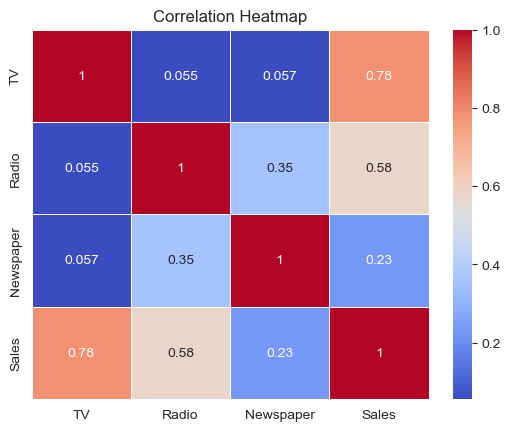

In [35]:
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

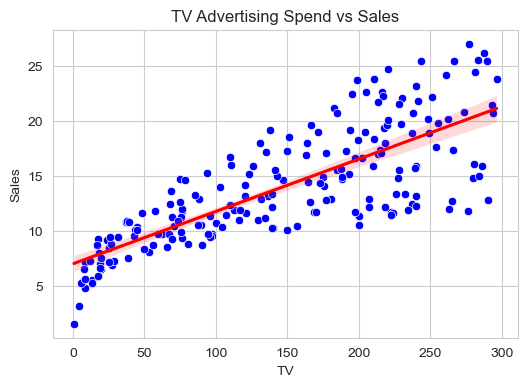

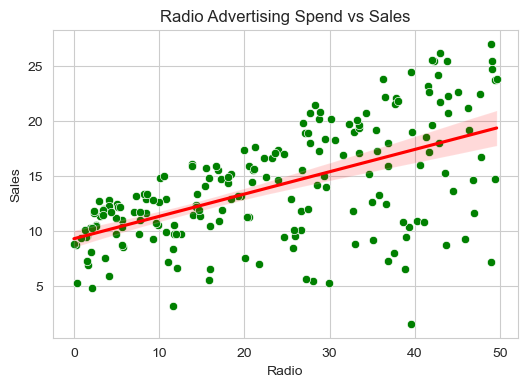

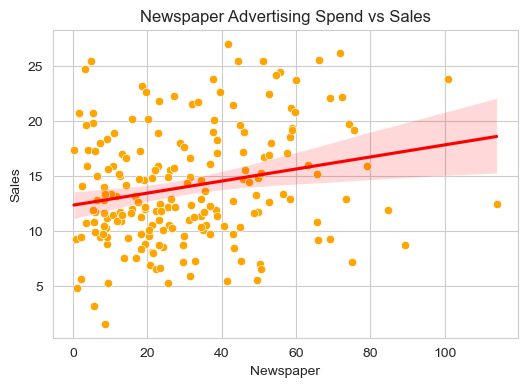

In [37]:
# TV vs Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x="TV", y="Sales", data=data, color="blue")
sns.regplot(x="TV", y="Sales", data=data, scatter=False, color="red")
plt.title("TV Advertising Spend vs Sales")
plt.show()

# Radio vs Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Radio", y="Sales", data=data, color="green")
sns.regplot(x="Radio", y="Sales", data=data, scatter=False, color="red")
plt.title("Radio Advertising Spend vs Sales")
plt.show()

# Newspaper vs Sales
plt.figure(figsize=(6, 4))
sns.scatterplot(x="Newspaper", y="Sales", data=data, color="orange")
sns.regplot(x="Newspaper", y="Sales", data=data, scatter=False, color="red")
plt.title("Newspaper Advertising Spend vs Sales")
plt.show()


<Figure size 600x400 with 0 Axes>

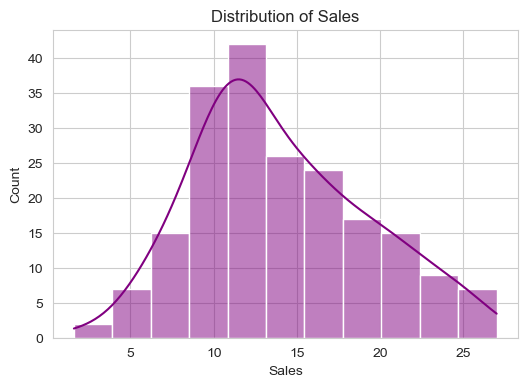

In [41]:
plt.figure(figsize=(6, 4))
sns.histplot(data["Sales"], kde=True, color="purple")
plt.title("Distribution of Sales")
plt.xlabel("Sales")
plt.show()


In [43]:
# Define features and target
X = data[['TV', 'Radio', 'Newspaper']]  # Features
y = data['Sales']                        # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [45]:
# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)


LinearRegression()

In [47]:
# Make predictions
y_pred = model.predict(X_test)


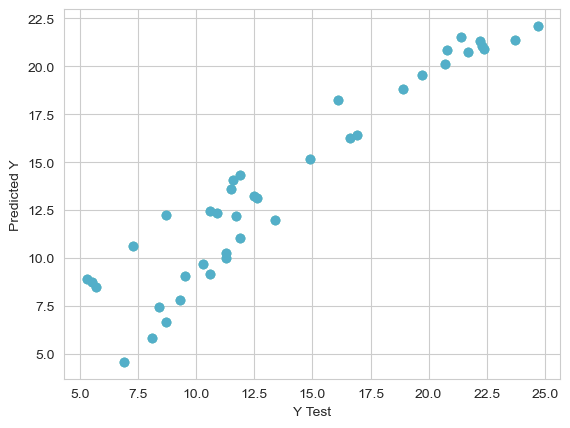

In [53]:
plt.scatter(y_test,y_pred)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')
plt.show()

In [55]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')


Mean Squared Error: 3.1740973539761046
R² Score: 0.899438024100912


In [57]:
# Sample test data to evaluate the model predictions
test_data = {
    'TV': [150.0, 200.0, 50.0],
    'Radio': [25.0, 30.0, 10.0],
    'Newspaper': [45.0, 60.0, 20.0]
}
test_df = pd.DataFrame(test_data)

# Making predictions using the trained model
predicted_sales = model.predict(test_df)

print(predicted_sales)

[14.54262146 17.76648932  7.16271604]
